# Loading/Cleaning the Data

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [88]:
df=pd.read_table('orchard.txt') #i copied and pasted the data into a txt file


In [89]:
df.columns=['Season','Week','Metric']

In [90]:
df.iloc[6]['Metric']=3393847.333

In [91]:
df.iloc[13]['Metric']=2230368.154

In [92]:
df.iloc[31]['Metric']=2499467.538

In [93]:
df.iloc[33]['Metric']=1603058.579

In [94]:
df['Metric']=pd.to_numeric(df['Metric'])

In [95]:
def clean_week(week):
    week=[int(s) for s in str.split(week) if s.isdigit()]
    return week[0]
        
    

In [96]:
df['Week']=df['Week'].apply(clean_week)

In [97]:
df=df.set_value(24, 'Season','2015')

/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [98]:
df['Season']=pd.to_datetime(df['Season'])

In [101]:
df['Season']=df['Season'].dt.year

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Season    40 non-null int64
Week      40 non-null int64
Metric    40 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


In [107]:
df

,Season,Week,Metric
0,2014,1,1.902134e+06
1,2014,2,1.740817e+06
2,2014,3,2.350374e+06
3,2014,4,4.181746e+06
4,2014,5,1.877183e+06
5,2014,6,1.502510e+07
6,2014,7,3.393847e+06
7,2014,8,3.868083e+06
8,2014,9,3.694420e+06
9,2014,10,2.658483e+06


Now that the data is loaded and cleaned, we can begin the analysis

# Analysis

For the purposes of this analysis, the metric in question shall be designated as the total amount of views of Psy's "Gangnam Style".  

In [109]:
df['Metric'].mean() #average over the two years

5174231.149274998

In [110]:
df['Metric'].sum() #total number of views 

206969245.97100002

In [111]:
df.groupby('Season').mean() #mean grouped by year

,Week,Metric
Season,,
2014,10.5,6.715972e+06
2015,10.5,3.632491e+06


In [112]:
df.groupby('Season').sum() #2014 had almost twice as many views. "Gangnam Style" is getting less popular over time

,Week,Metric
Season,,
2014,210,1.343194e+08
2015,210,7.264981e+07


Text(0.5,1,'Views  of "Gangnam Style" over 2015')

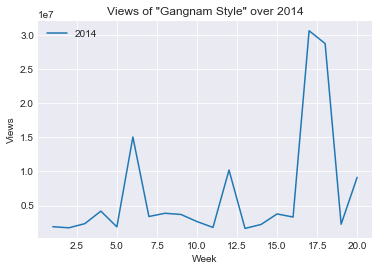

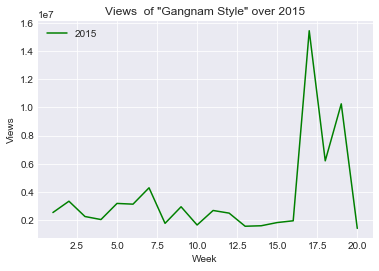

In [180]:
df[df['Season']==2014].plot(x='Week', y='Metric', label='2014')
plt.title('Views of "Gangnam Style" over 2014')
plt.ylabel('Views',size=10)
df[df['Season']==2015].plot(x="Week", y="Metric", color='green', label="2015")
plt.ylabel('Views', size=10)
plt.title('Views  of "Gangnam Style" over 2015')

In 2014, the amount of views of "Gangnam Style" seems to be cyclical. There were 3 distinct peaks of viwership each spaced around 5-6 weeks apart. This seasonality trend is not pronounced in 2015. However, both 2014 and 2015 saw the greatest number of views coming at around the week 17 mark. Perhaps this is due to some event that occurs the same time every year. Perhaps Psy is performing at a particular festival leading to a revival of interest in the song around the same time each year. 

Text(0,0.5,'Views')

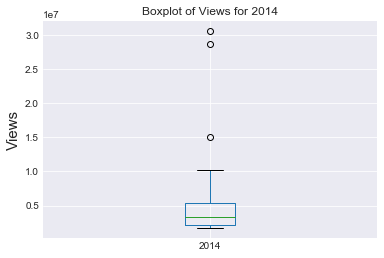

In [186]:
df[df['Season']==2014].plot(x='Week', y='Metric', label='2014', kind='box')
plt.title('Boxplot of Views for 2014')
plt.ylabel("Views", size=15)

Text(0,0.5,'Views')

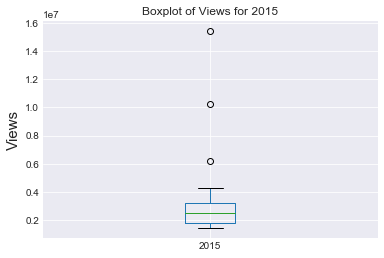

In [188]:
df[df['Season']==2015].plot(x='Week', y='Metric', label='2015', kind='box')
plt.title('Boxplot of Views for 2015')
plt.ylabel("Views", size=15)

The above box plots are very telling. For both years, there seem to be three outlier weeks. This could potentially skew some of the descriptive statistics we calculated above (was 2014 really that much better than 2015 in terms of # of views?). Let's remove any weeks whose views that are greater than 2 standard deviations.

In [194]:
df2=df[df['Metric']<=(df['Metric'].std())*2]

In [196]:
df2.count() #4 Weeks of values were removed. 

Season    36
Week      36
Metric    36
dtype: int64

In [197]:
df2.groupby("Season")['Metric'].mean() #when accounting for outliers, the two years are nearly identical

Season
2014    3.530103e+06
2015    3.011202e+06
Name: Metric, dtype: float64

In [198]:
df2.groupby("Season")["Metric"].sum() #same for the total viewership

Season
2014    6.001175e+07
2015    5.721283e+07
Name: Metric, dtype: float64

Overall, it is very important to consider outliers when dealing with a very limited amount of data. At first glance, 2014 seemed to show that people watched "Gangnam Style" twice as much as 2015. This could indicate a waning of popularity. However, upon further inspection, there were 4 total outlier values in the data. Removing these values showed that both years were nearly identical in terms of viewership. Yet, was it valid to remove these outliers? This is an extremely poignant aspect of Data Analytics I want to emphasize. Data Analysts cannot divorce themselves from the business/domain they are analyzing. They need to live and breathe the industry they are working in. Using my business knowledge, I could assess if there were any specific reason for the outlier values I observed and thus could decide whether or not to include them. Maybe Psy had a suprise appearance on Conan O'Brian during one of those weeks. Maybe a newly minted meme came out causing a surge of popularity. Maybe he performed a funky hook on the latest Drake album? There's no way to explain the data sufficiently without context. By interpeting the numbers while keeping real life business knowledge in mind, we can squeeze every ounce of analytical capability from the data!!!